In [1]:
#importing the libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

# 2. Dataset
For this post, we are going to be using sklearn’s famous breast_cancer dataset

In [2]:
#importing the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data['data']
y = data['target']
print("shape of x: {}\nshape of y: {}".format(x.shape,y.shape))

shape of x: (569, 30)
shape of y: (569,)


# 3. Feature Scaling
It is important to scale the features to a standard normal before sending it to the neural network.
basically, This subtracts the mean of the column and divides by the standard deviation of a column for each value in the column ( Independent Variable)

In [3]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# 4. Dataset and DataLoader
Dataset class in pytorch basically covers the data in a tuple and enables us to access the index of each data. this is necessary to create dataloader class which can be used to shuffle, apply Mini-Batch Gradient Descent and more.
Check out the previous post for more examples on how this works

In [4]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length
trainset = dataset(x,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

# 5. Neural Network for Classsification

In [5]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

# Selecting various parameters such as number of epochs , loss function , learning rate and more

In [6]:
#hyper parameters
learning_rate = 0.01
epochs = 700
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

# BCELoss is a pytorch class for Binary Cross Entropy loss which is the standard loss function used for binary classification.

# Training
The Gradients that are found from the loss function are used to change the values of the weights and the process is repeated several times.
This is done to minimize the loss function and increase the accuracy
Also , the Dataset is not split into training and test set because the amount of data is already low

In [7]:
#forward loop
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(x,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.7149179577827454	 accuracy : 0.3655536028119508
epoch 50	loss : 0.1706404983997345	 accuracy : 0.9578207381370826
epoch 100	loss : 0.08886819332838058	 accuracy : 0.9736379613356766
epoch 150	loss : 0.07019762694835663	 accuracy : 0.9789103690685413
epoch 200	loss : 0.06052989885210991	 accuracy : 0.9824253075571178
epoch 250	loss : 0.053429652005434036	 accuracy : 0.984182776801406
epoch 300	loss : 0.048296235501766205	 accuracy : 0.9859402460456942
epoch 350	loss : 0.04460669681429863	 accuracy : 0.9894551845342706
epoch 400	loss : 0.04186464846134186	 accuracy : 0.9912126537785588
epoch 450	loss : 0.03959687799215317	 accuracy : 0.9929701230228472
epoch 500	loss : 0.03773213177919388	 accuracy : 0.9929701230228472
epoch 550	loss : 0.03593584895133972	 accuracy : 0.9929701230228472
epoch 600	loss : 0.03414404019713402	 accuracy : 0.9929701230228472
epoch 650	loss : 0.03243443742394447	 accuracy : 0.9929701230228472


Text(0, 0.5, 'loss')

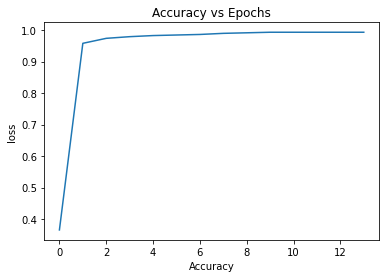

In [9]:
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [15]:
from sklearn.model_selection import train_test_split
# i.e. 80 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.70)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier(n_estimators = 100) 

In [18]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100)


ACCURACY OF THE MODEL:  94.73684210526315


In [23]:
from sklearn import datasets, linear_model, metrics

# create logistic regression object
reg = linear_model.LogisticRegression()
   
# train the model using the training sets
reg.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = reg.predict(X_test)
   
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 96.99248120300751
